In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy as sci
from sklearn.linear_model import LinearRegression
from os import listdir
import pandas as pd
import os
import glob

In [2]:
# rename dat files and save in /n and /s
n_ = [i for i in listdir('./files/') if '.dat' in i if 'dla_mode_n' in i]
s_ = [i for i in listdir('./files/') if '.dat' in i if 'dla_mode_s' in i]
name = [f'dla_mode_n_ts_{10**(int(i/26))}_nb_10000_seed_{i}_.dat' for i in range(5,105,5)]
name_ = [f'dla_n_mode_{10**(int(i/26))}_{int(i/5%5)}.dat' for i in range(5,105,5)]

os.rename('./files/'+name[-1],'./files/n/'+name_[-1])

['dla_mode_n_ts_1_nb_10000_seed_5_.dat', 'dla_mode_n_ts_1_nb_10000_seed_10_.dat', 'dla_mode_n_ts_1_nb_10000_seed_15_.dat', 'dla_mode_n_ts_1_nb_10000_seed_20_.dat', 'dla_mode_n_ts_1_nb_10000_seed_25_.dat', 'dla_mode_n_ts_10_nb_10000_seed_30_.dat', 'dla_mode_n_ts_10_nb_10000_seed_35_.dat', 'dla_mode_n_ts_10_nb_10000_seed_40_.dat', 'dla_mode_n_ts_10_nb_10000_seed_45_.dat', 'dla_mode_n_ts_10_nb_10000_seed_50_.dat', 'dla_mode_n_ts_100_nb_10000_seed_55_.dat', 'dla_mode_n_ts_100_nb_10000_seed_60_.dat', 'dla_mode_n_ts_100_nb_10000_seed_65_.dat', 'dla_mode_n_ts_100_nb_10000_seed_70_.dat', 'dla_mode_n_ts_100_nb_10000_seed_75_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_80_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_85_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_90_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_95_.dat', 'dla_mode_n_ts_1000_nb_10000_seed_100_.dat']
['dla_n_mode_1_1.dat', 'dla_n_mode_1_2.dat', 'dla_n_mode_1_3.dat', 'dla_n_mode_1_4.dat', 'dla_n_mode_1_0.dat', 'dla_n_mode_10_1.dat', 'dla_n_mode_10_

FileNotFoundError: [Errno 2] No such file or directory: './files/dla_mode_n_ts_1000_nb_10000_seed_100_.dat' -> './files/n/dla_n_mode_1000_0.dat'

In [3]:
os.rename('./files/dla_mode_n_ts_1000_nb_50_seed_10_.dat','./files/n/teste1.dat')

In [7]:
## save files in /particles
def extend_fibers(fname):    
    print('extending ', fname)
    #fout = fname.replace('dla_','')
    fout = fname.replace('/n','/particles')
    with open (fout, "w") as fid:
        with open(fname, 'r') as fid2:
            for row in fid2:
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])
                    for i in range(0,18):
                        fid.write('uid %d %d %d %d\n' %(id, x, y+i, z))

wdir = './files/particles'

#for fname in os.listdir(wdir):
fname = './files/n/teste.dat'
extend_fibers(os.path.join(wdir, fname))

extending  ./files/particles/./files/n/teste.dat


FileNotFoundError: [Errno 2] No such file or directory: './files/particles/./files/particles/teste.dat'

In [86]:
def mass_center(fname):
    y = []
    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y.append(int(row[3]))
    yc, counts = np.unique(y, return_counts=True)    
    #print(yc)
    #print(counts)
    fiber_length = np.max(yc) - np.min(yc)
    # y of mass center
    yc0 = sorted(zip(yc, counts), key=lambda u: u[1], reverse=True)
    #print(yc0)
    #print(yc0[0][0])


    return yc0 , counts, yc0[0][0], fiber_length

def transversal_section(fname, yc0, yc):
   
   
    x, z = [], []
    with open(fname, 'r') as fid:
        for row in fid:
            row = row.split()
            y = int(row[3])
            
            if y == yc0:
                print('entrou')
                #print(int(row[2]))
                x.append(int(row[2]))
                z.append(int(row[4]))

    xc, zc = np.mean(x), np.mean(z)
    #print(x)
    #print(z)
    x = np.array(x)
    z = np.array(z)
    print(x)
    print(z)
    x2 = np.power(x-xc,2)
    z2 = np.power(z-zc,2)
    radius = np.max(np.sqrt(x2+z2))
    #radius = np.max([np.sqrt(((x[i]-xc)**2) + ((z[i]-zc)**2)) for i in range(len(x))])
    #radius = np.max(radius)
    #print(radius)
    #plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados')
    #plt.show()
    return x, z, xc, zc, radius

def fractal(Radius,x,z,xcent,zcent,arquivo):
    ## frac dimension 
    n = 100
    radius = np.linspace(5,Radius,n)
    cont = np.zeros(n)
    for j in range(0,len(radius)):
        c = 0
        for i in range(0,len(x)):
            ri = m.sqrt(((x[i]-xcent) **2) + ((z[i]-zcent)**2))
            if ri <= radius[j]:
                c += 1
                cont[j] = c
    #radius = 0
    occup = float(len(x))
    A = float(np.pi*(Radius**2))
    densitty = float(occup/A * 100)
    print("massa: %f" % occup)
    print("Area: %f" %A)
    print("Densidade %.2f" % densitty)
    #print(radius)
    vmin = np.log(radius[0])
    vmax = np.log(radius[-1])
    radius = np.log(radius).reshape(-1,1)
    cont = np.log(cont).reshape(-1,1)
    j, R = 0, 0
    for i in range(10,len(radius)):
        reg = LinearRegression().fit(radius[:i], cont[:i])
        r2 = reg.score(radius[:i], cont[:i])
        if(r2 > R):     
            R = r2
            j = i
        #Y = reg.coef_*v[:i] + reg.intercept_
    reg = LinearRegression().fit(radius[:j], cont[:j])
    print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.array([vmin,vmax]) + reg.intercept_
    plt.figure(figsize = (8,8))
    plt.plot(radius, cont, 'o--',color='darkslategray')
    plt.xlabel('log R (lattices units)')
    plt.ylabel('log m (ocuppied lattices units)')
    plt.plot(np.array([vmin,vmax]), Y[0], '--',color='darkred', label = "d_f = {:.2f}".format(reg.coef_[0][0]))
    plt.legend()
    plt.savefig("./img/"+arquivo[18:-3] + 'jpg', dpi=400)
    #plt.show()

    theta = np.linspace(0,2*np.pi,2000)
    x_ = xcent+Radius*np.cos(theta)
    y_ = zcent+Radius*np.sin(theta)

    plt.figure(figsize=(8,8))
    #plt.grid()
    plt.plot([xcent],[zcent],'s',color='darkorange',zorder = 5,label = 'Centro') # Centro
    plt.plot(x,z,'s',color='darkslategray',zorder = 1,label = 'Dados') # Dados
    plt.plot(x_,y_,color = 'darkred',zorder = 0,label = 'Circuferência')
    #plt.legend()
    plt.axis('off')
    plt.savefig("img/"+arquivo[18:-4]+"_fractal.jpg", dpi=400)
    #plt.show()

    return reg.coef_[0][0], densitty

def mass_per_length(yt,counts,max, num):
    plt.figure(figsize = (8,8))
    yleft = []
    yright = []
    xleft = []
    xright = []
    #print(yt)

    idx = np.round(np.linspace(0, len(yt) - 1, num)).astype(int)


    for j in idx:

        #print(type(int(j)))
        plt.plot(yt[int(j)] - np.min(yt), counts[int(j)], 'ro', zorder = 1)
        #print(yt[j] - min(yt))
        #print(counts[j])

        if yt[j] > max:
            yright.append(counts[j])
            xright.append(yt[j] - np.min(yt))

        else:
            yleft.append(counts[j])
            xleft.append(yt[j] - np.min(yt))
        

    #plt.xlim(0,2200)
    #plt.ylim(0,210)

    ## Lado esquerdo 
    yleft=np.array(yleft)
    xleft=np.array(xleft)
    xleft = xleft.reshape(-1,1)
    yleft = yleft.reshape(-1,1)


    ## Lado direito
    yright=np.array(yright)
    xright=np.array(xright)
    xright = xright.reshape(-1,1)
    yright = yright.reshape(-1,1)


    reg = LinearRegression().fit(xleft, yleft)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Y = reg.coef_*np.linspace(np.min(xleft),np.max(xleft),len(xleft)) + reg.intercept_
    Y = Y[0]
    plt.plot(np.linspace(np.min(xleft),np.max(xleft),len(xleft)), Y, 'b-', zorder = 5)

    reg = LinearRegression().fit(xright, yright)
    #print(reg.coef_,reg.intercept_)
    #print(v[-1][0])
    Yy = reg.coef_*np.linspace(np.min(xright),np.max(xright),len(xright)) + reg.intercept_
    Yy = Yy[0]
    plt.plot(np.linspace(np.min(xright),np.max(xright),len(xright)), Yy, 'b-', zorder = 5)
    plt.xlabel('Distance from tip (lattices units)')
    plt.ylabel('Mass (occupied lattices units)')
    plt.show()

In [80]:
arquivo_ = ('./files/particles/%s' %(fname[4:]))
print(arquivo_)
yt, counts, max, length = mass_center(arquivo_)
x, z, xc, zc, radius = transversal_section (arquivo_, max)
df, densidade = fractal(radius,x,z,xc,zc,arquivo_)
mass_per_length(yt,counts,max, num)

./files/particles/les/n/dla_mode_n_ts_1000_nb_10000_seed_90_.dat


FileNotFoundError: [Errno 2] No such file or directory: './files/particles/les/n/dla_mode_n_ts_1000_nb_10000_seed_90_.dat'

In [ ]:
arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(1,j))
print(arquivo_)
yt, counts, max, length = mass_center(arquivo_)
#print(max[0])

x, z, xc, zc, radius = transversal_section (arquivo_, max)

In [ ]:
num = 50
c = 0
L, R , D, F, I = [], [], [], [], 1

for i in range(0,4):
    for j in range(0,5):

        arquivo_ = ('./files/particles/n_mode_%d_%d.dat' %(I,j))
        yt, counts, max, length = mass_center(arquivo_)
        x, z, xc, zc, radius = transversal_section (arquivo_, max)
        df, densidade = fractal(radius,x,z,xc,zc,arquivo_)
        mass_per_length(yt,counts,max, num)
    
        if c < 5: 
            print("No arquivo %s" %arquivo_)
            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("%s\n" % arquivo_)
                fid.write("\n")
                fid.write("Length ........ %d\n" %length)
                fid.write("Radius ........ %d\n" %radius)
                fid.write("Density ....... %.2f\n" %densidade)
                fid.write("Fractal dim ... %.2f\n" %df)

            L.append(length)
            R.append(radius)
            D.append(round(densidade, 2))
            F.append(round(df, 2))
            c+= 1

        if c == 5:

            mL = sum(L)/len(L)
            mR = sum(R)/len(R)
            mD = sum(D)/len(D)
            mF = sum(F)/len(F)

            with open("./files/data/ teste.txt", "a") as fid:
                fid.write("\n")
                fid.write("AVERAGE %s\n" % arquivo_)
                fid.write("\n")
                fid.write("<Length> ........ %d\n" %mL)
                fid.write("<Radius> ........ %d\n" %mR)
                fid.write("<Density> ....... %.2f\n" %mD)
                fid.write("<Fractal dim> ... %.2f\n" %mF)
                fid.write("\n")

            c = 0

    I = I *10


Para 1 arquivo


In [62]:

def extend_fibers(fname):    
    print('extending ', fname)
    #fout = fname.replace('dla_','')
    fout = fname.replace('/n','/particles')
    with open (fout, "w") as fid:
        with open(fname, 'r') as fid2:
            for row in fid2:
                if 'uid:' in row:
                    row = row.split()
                    id = int(row[1])
                    x = int(row[2])
                    y = int(row[3])
                    z = int(row[4])
                    for i in range(0,18):
                        fid.write('uid %d %d %d %d\n' %(id, x, y+i, z))

wdir = './files/particles'

#for fname in os.listdir(wdir):
fname = './files/n/dla_mode_n_ts_1000_nb_10000_seed_90_.dat'
extend_fibers(fname)

extending  ./files/n/dla_mode_n_ts_1000_nb_10000_seed_90_.dat


4
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entrou
entr

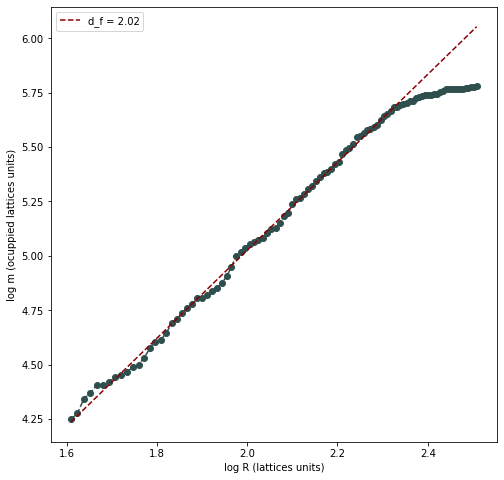

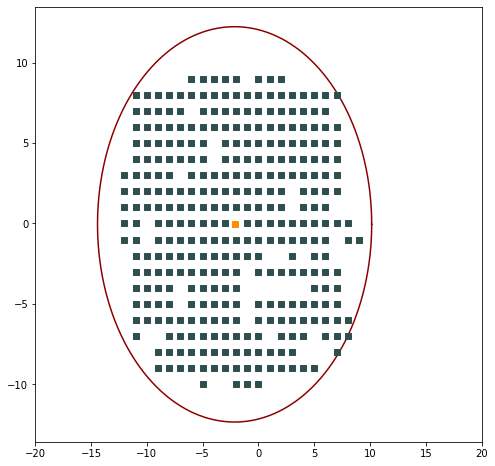

In [85]:
arquivo_ = ('./files/particles/dla_mode_n_ts_1000_nb_10000_seed_90_.dat')
yt, counts, max, length = mass_center(arquivo_)
print(max)
x, z, xc, zc, radius = transversal_section (arquivo_, max, yt)
df, densidade = fractal(radius,x,z,xc,zc,arquivo_)
#mass_per_length(yt,counts,max, num)

In [68]:
a = np.array([1,2,3])

In [72]:
np.dot(a-10,a.T-10)

194

In [87]:
from colour import Color

In [7]:
##Compare two files


import filecmp
  
f1 = "./files/dla_mode_n_ts_1000_nb_500_seed_51_1.dat"
f2 = "./files/dla_mode_n_ts_1000_nb_500_seed_51_.dat"

result = filecmp.cmp(f1, f2, shallow = True)
print(result)

True
